In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d62a987b809f5710f0dfb5d892718013


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | honavar
Processing Record 6 of Set 1 | guajara-mirim
City not found. Skipping...
Processing Record 7 of Set 1 | atar
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | mitla
Processing Record 10 of Set 1 | ulaangom
Processing Record 11 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 12 of Set 1 | alta floresta
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | spisska nova ves
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | la ronge
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of

Processing Record 38 of Set 4 | koumac
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | hambantota
Processing Record 41 of Set 4 | imeni poliny osipenko
Processing Record 42 of Set 4 | faya
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 4 | yuanping
Processing Record 47 of Set 4 | polunochnoye
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | requena
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | sungaipenuh
Processing Record 2 of Set 5 | qaqortoq
Processing Record 3 of Set 5 | iralaya
Processing Record 4 of Set 5 | goderich
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | canto do buriti
Processing Record 8 of Set 5 | tromso
Processing Record 9 of Set 5 | bethel
Processing Record 10 of Set 5 | pankovka
Processing Record 11 of Set 5

Processing Record 27 of Set 8 | baker city
Processing Record 28 of Set 8 | zhangye
Processing Record 29 of Set 8 | marcona
City not found. Skipping...
Processing Record 30 of Set 8 | anicuns
Processing Record 31 of Set 8 | amapa
Processing Record 32 of Set 8 | sechura
Processing Record 33 of Set 8 | smithers
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | srednekolymsk
Processing Record 36 of Set 8 | serov
Processing Record 37 of Set 8 | sal rei
Processing Record 38 of Set 8 | harsud
Processing Record 39 of Set 8 | matara
Processing Record 40 of Set 8 | toyooka
Processing Record 41 of Set 8 | aranos
Processing Record 42 of Set 8 | zaysan
Processing Record 43 of Set 8 | tricase
Processing Record 44 of Set 8 | aflu
City not found. Skipping...
Processing Record 45 of Set 8 | banda aceh
Processing Record 46 of Set 8 | najran
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | panguna
Processing Record 49 of Set 8 | amazar
Processing Record 50 of

Processing Record 13 of Set 12 | cooma
Processing Record 14 of Set 12 | sorland
Processing Record 15 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 12 | kendari
Processing Record 17 of Set 12 | limon
Processing Record 18 of Set 12 | henties bay
Processing Record 19 of Set 12 | grindavik
Processing Record 20 of Set 12 | hohhot
Processing Record 21 of Set 12 | kalat
Processing Record 22 of Set 12 | bay roberts
Processing Record 23 of Set 12 | laguna
Processing Record 24 of Set 12 | loyga
Processing Record 25 of Set 12 | wagga wagga
Processing Record 26 of Set 12 | takoradi
Processing Record 27 of Set 12 | santarem
Processing Record 28 of Set 12 | tingrela
City not found. Skipping...
Processing Record 29 of Set 12 | ust-uda
Processing Record 30 of Set 12 | terme
Processing Record 31 of Set 12 | dakar
Processing Record 32 of Set 12 | awjilah
Processing Record 33 of Set 12 | koutiala
Processing Record 34 of Set 12 | cozumel
Processing Record 35 of Set 12 | m

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,71.60,49,90,3.44,MX,2021-01-19 19:26:32
1,Ushuaia,-54.8000,-68.3000,60.80,44,20,5.75,AR,2021-01-19 19:22:56
2,Jamestown,42.0970,-79.2353,28.99,80,90,14.97,US,2021-01-19 19:27:29
3,Hithadhoo,-0.6000,73.0833,81.12,70,0,8.66,MV,2021-01-19 19:27:29
4,Honavar,14.2833,74.4500,75.45,66,0,3.87,IN,2021-01-19 19:27:29
5,Atar,20.5169,-13.0499,68.04,19,5,10.31,MR,2021-01-19 19:27:29
6,Mitla,16.9167,-96.4000,78.80,24,75,2.30,MX,2021-01-19 19:27:29
7,Ulaangom,49.9811,92.0667,-18.49,86,73,2.93,MN,2021-01-19 19:27:29
8,Alta Floresta,-9.8756,-56.0861,77.00,88,90,4.61,BR,2021-01-19 19:27:30
9,Mataura,-46.1927,168.8643,43.93,95,100,10.13,NZ,2021-01-19 19:27:30


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2021-01-19 19:26:32,22.8909,-109.9124,71.60,49,90,3.44
1,Ushuaia,AR,2021-01-19 19:22:56,-54.8000,-68.3000,60.80,44,20,5.75
2,Jamestown,US,2021-01-19 19:27:29,42.0970,-79.2353,28.99,80,90,14.97
3,Hithadhoo,MV,2021-01-19 19:27:29,-0.6000,73.0833,81.12,70,0,8.66
4,Honavar,IN,2021-01-19 19:27:29,14.2833,74.4500,75.45,66,0,3.87
5,Atar,MR,2021-01-19 19:27:29,20.5169,-13.0499,68.04,19,5,10.31
6,Mitla,MX,2021-01-19 19:27:29,16.9167,-96.4000,78.80,24,75,2.30
7,Ulaangom,MN,2021-01-19 19:27:29,49.9811,92.0667,-18.49,86,73,2.93
8,Alta Floresta,BR,2021-01-19 19:27:30,-9.8756,-56.0861,77.00,88,90,4.61
9,Mataura,NZ,2021-01-19 19:27:30,-46.1927,168.8643,43.93,95,100,10.13


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

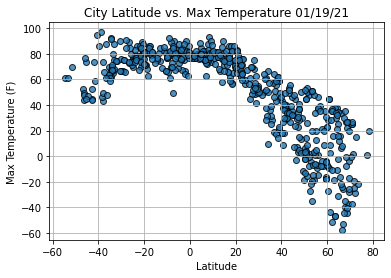

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

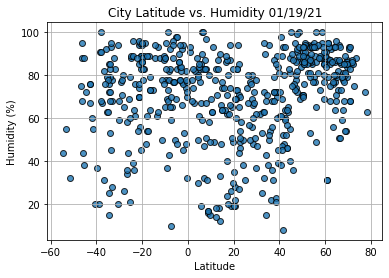

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

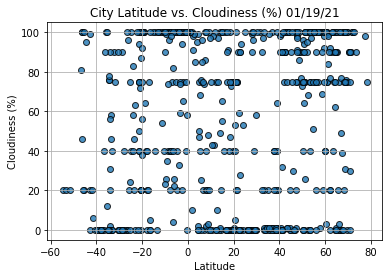

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

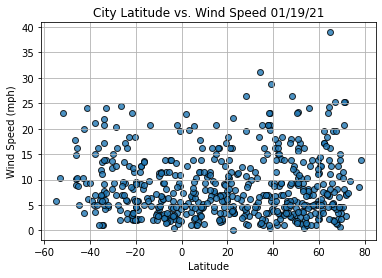

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()